# Assignment 2: Regression with Decision Trees and Gradient Boosting

In this assignment [demographic data of german counties](../Data/landkreise.csv) shall be applied to predict the average living rent per squaremeter. Prediction shall be modelled by *Decision Trees* and *GradientBoosting* for Regression.

## Task 1:
Prepare yourself for this assignment by studying: 
* [notebook 02DecisionTree.ipynb](../02DecisionTree.ipynb). In this notebook the use of scikit-learn Decision Trees for classification is described. In this assignment Decision Trees will be applied for regression. Moreover, the notebook describes how to plot Decision Trees to a .pdf document. For this you have to install the python package `pydotplus` and the [Graphviz](https://www.graphviz.org) software.
* [notebook 05GradientBoostingRegression.ipynb](../05GradientBoostingRegression.ipynb). This notebook describes the use of scikit-learn's GradientBoosting class. Theory for GradientBoosting is sketched in [notebook 05EnsembleMethods.ipynb](../05EnsembleMethods.ipynb).  

## Task 2: 
1. Read data from [demographic data of german counties](../Data/landkreise.csv) into a pandas dataframe. 
    * Ignore column `Kreis` for the following modelling tasks
    * Use column `Miete` as the target-variable, which shall be predicted
    * Use all remaining columns as input-features
2. Split the entire dataset into a training-partition (70%) and a test-partition (30%).

## Task 3:
1. Train a [DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) using the training partition.
2. Apply the same methods as in section 3 of [notebook 05GradientBoostingRegression.ipynb](../05GradientBoostingRegression.ipynb) in order to
    * calculate the predictions on the test-data-partition
    * determine the regression metrics (copy the corresponding function `determineRegressionMetrics`) into this notebook).
    * determine the feature-importances as calculated by the decision tree
    * visualize the prediction error
3. Plot the learned decision tree to a .pdf file by applying pydotplus and Graphviz

In [1]:
### Task 2
##1.
# load librarys
import pandas as pd
from sklearn.model_selection import train_test_split

# read demographic data of german counties
gcountry= pd.read_csv("/Users/sannaherzog/Documents/Master Data Science/Data Mining/Git Repository/DataMiningProcess/Data/landkreise2017.csv",
            sep =";", decimal =',')
# drop Kreis
gcountry= gcountry[gcountry.columns.drop("Kreis")]
         
gcountry.head(10)
gcountry.describe()


,Alter,Auslaenderanteil,Arbeitslosenrate,Bip,Miete,BevEntw
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,44.271891,8.902239,5.772388,33471.393035,6.657065,-0.531343
std,1.878765,4.830155,2.594817,14595.671225,1.697541,8.231802
min,39.800000,1.900000,1.400000,15000.000000,4.250000,-22.100000
25%,43.000000,5.500000,3.625000,24800.000000,5.425000,-5.600000
50%,44.050000,8.050000,5.450000,29150.000000,6.165000,0.350000
75%,45.400000,11.700000,7.200000,36900.000000,7.517500,4.900000
max,49.300000,33.600000,14.700000,136200.000000,15.650000,20.500000


In [2]:
featureCols = gcountry[['Alter', 'Auslaenderanteil', 'Arbeitslosenrate', 'Bip', 'BevEntw']]

X = featureCols.values
featureCols = featureCols.columns[:]
print(featureCols)
#[['Alter', 'Auslaenderanteil', 'Arbeitslosenrate', 'Bip', 'BevEntw']]
y = gcountry[['Miete']]
y = y.values
#X=gcountry[featureCols].
#y=gcountry[targetCol]


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

Index(['Alter', 'Auslaenderanteil', 'Arbeitslosenrate', 'Bip', 'BevEntw'], dtype='object')


In [3]:
type(X)

numpy.ndarray

In [4]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

regressor = DecisionTreeRegressor(random_state=13)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=13, splitter='best')

In [5]:
from sklearn.metrics import mean_squared_error, explained_variance_score, mean_absolute_error, r2_score, median_absolute_error
import pickle

In [6]:
#with open('regressor.pkl', 'wb') as f:
    #pickle.dump(regressor, f)

In [7]:
y_pred=regressor.predict(X_test)


In [8]:
def determineRegressionMetrics(y_test,y_pred,title=""):
    mse = mean_squared_error(y_test, y_pred)
    mad = mean_absolute_error(y_test, y_pred)
    #rmsle=np.sqrt(mean_squared_error(np.log(y_test+1),np.log(y_pred+1)))
    r2=r2_score(y_test, y_pred)
    med=median_absolute_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred) 
    print(title)
    print("Mean absolute error =", round(mad, 2))
    print("Mean squared error =", round(mse, 2))
    print("Median absolute error =", round(med, 2))
    print("R2 score =", round(r2, 2))
    #print "Root Mean Squared Logarithmic Error =",rmsle
    print("Explained variance score =", round(evs, 2))
    

In [9]:
title="DT Regression"
determineRegressionMetrics(y_test,y_pred,title=title)

DT Regression
Mean absolute error = 0.81
Mean squared error = 1.37
Median absolute error = 0.58
R2 score = 0.59
Explained variance score = 0.6


In [10]:
from matplotlib import pyplot as plt

In [11]:
def plot_feature_importances(feature_importances, title, feature_names,std="None"):
    
    # Normalize the importance values 
    feature_importances = 100.0 * (feature_importances / max(feature_importances))
    if std=="None":
        std=np.zeros(len(feature_importances))

    # Sort the values and flip them
    index_sorted = np.flipud(np.argsort(feature_importances))

    # Arrange the X ticks
    pos = np.arange(index_sorted.shape[0]) + 0.5

    # Plot the bar graph
    plt.figure(figsize=(16,10))
    plt.bar(pos, feature_importances[index_sorted], align='center',alpha=0.5,yerr=100*std[index_sorted])
    plt.xticks(pos, feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()

In [12]:
importances = regressor.feature_importances_
importances

array([0.03151858, 0.16030763, 0.05289164, 0.04508157, 0.71020058])

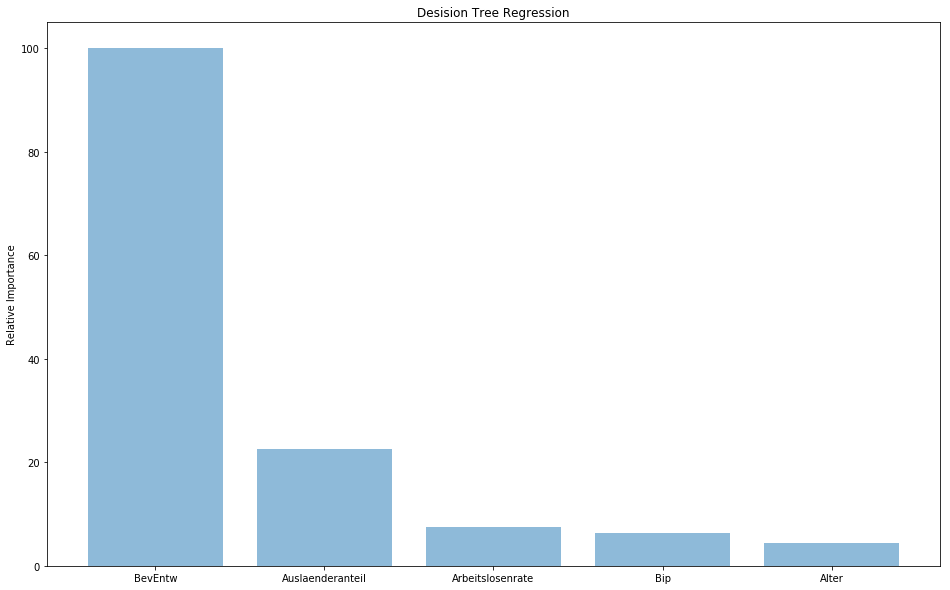

In [13]:
# Plot relative feature importances 
plot_feature_importances(regressor.feature_importances_, 'Desision Tree Regression', featureCols)

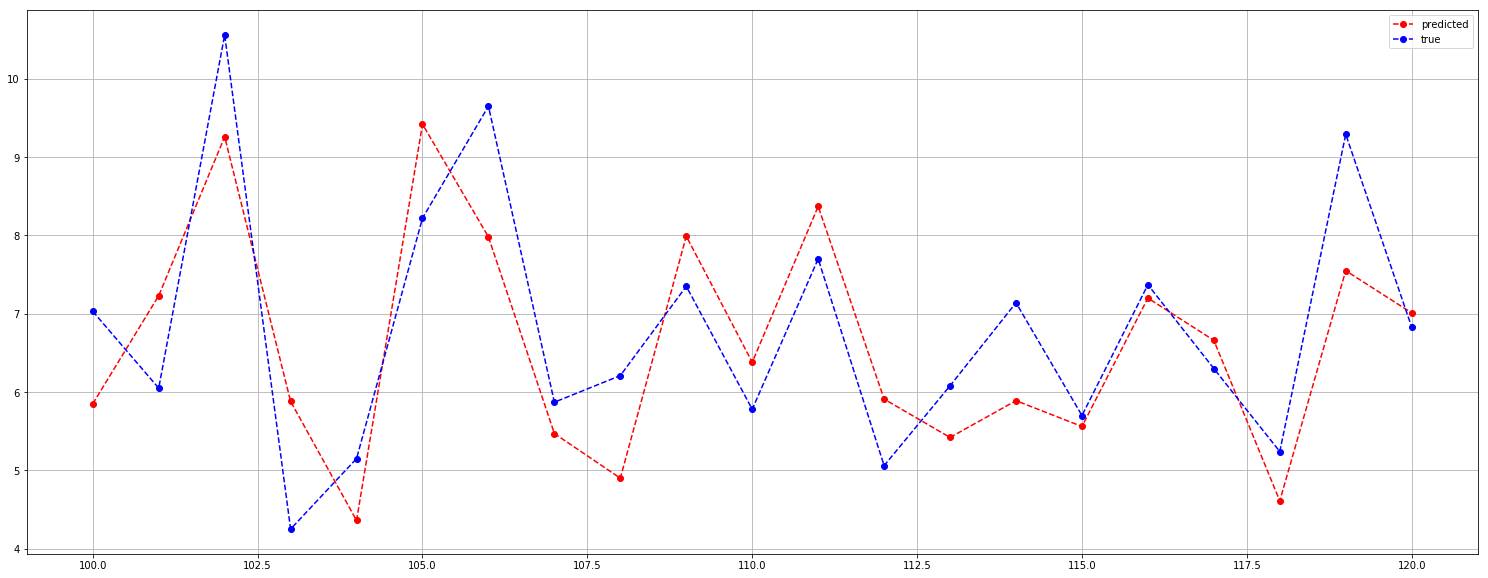

In [14]:
MIN=100
MAX=200
MAX=np.min([MAX,len(y_test)])
x_vals=np.arange(MIN,MAX)
y_pred_vals=y_pred[x_vals]
y_test_vals=y_test[x_vals]
plt.figure(figsize=(26,10))
plt.plot(x_vals,y_pred_vals,'ro--',label="predicted")
plt.plot(x_vals,y_test_vals,'bo--',label="true")
plt.grid(True)
plt.legend()
plt.show()

In [15]:
import sys
!{sys.executable} -m pip install cython
from sklearn import tree
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus
import pydot
import graphviz

tensorflow 1.10.0 has requirement numpy<=1.14.5,>=1.13.3, but you'll have numpy 1.15.1 which is incompatible.
tensorflow 1.10.0 has requirement setuptools<=39.1.0, but you'll have setuptools 39.2.0 which is incompatible.
keras 2.2.2 has requirement keras_applications==1.0.4, but you'll have keras-applications 1.0.2 which is incompatible.
keras 2.2.2 has requirement keras_preprocessing==1.0.2, but you'll have keras-preprocessing 1.0.1 which is incompatible.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [19]:
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Anaconda3\\Library\\bin\\graphviz'
dot_data = StringIO()
tree.export_graphviz(regressor, out_file=dot_data, feature_names=featureCols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("regressor.pdf")

InvocationException: GraphViz's executables not found

## Task 4: 
1. Apply 5-fold cross-validation for evaluation of the decision tree classifier. 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score 

In [ ]:
# Compute 5-fold cross-validation scores:
cv_scores = cross_val_score(regressor, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

# Print the average 5-fold cross-validation score
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

## Task 5:
1. Now apply 5-fold cross-validation for GradientBoostingRegressor on the same data.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbreg = GradientBoostingRegressor()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(gbreg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

# Print the average 5-fold cross-validation score
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

## Task 6:
Optimize parameters of the GradientBoostingRegressor by applying RandomizedSearchCV. 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
estimator_range=np.arange(20,330,50)
lr_range=np.arange(0.02,0.2,0.02)
#loss=['ls', 'lad', 'huber', 'quantile']

In [ ]:

#gb_regressor=GradientBoostingRegressor(n_estimators=300, random_state=0)
param_grid = [{'n_estimators': estimator_range, 'learning_rate': lr_range}]
gbRandomSearch = RandomizedSearchCV(estimator=gbreg, param_distributions=param_grid[0],scoring='neg_mean_absolute_error',cv=10)
gbRandomSearch.fit(X_train,y_train)

In [ ]:
print(gbRandomSearch.best_params_)
print(gbRandomSearch.best_score_)